In [4]:
#Importing packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Defining function reference for min-max normalization
mmft = MinMaxScaler().fit_transform

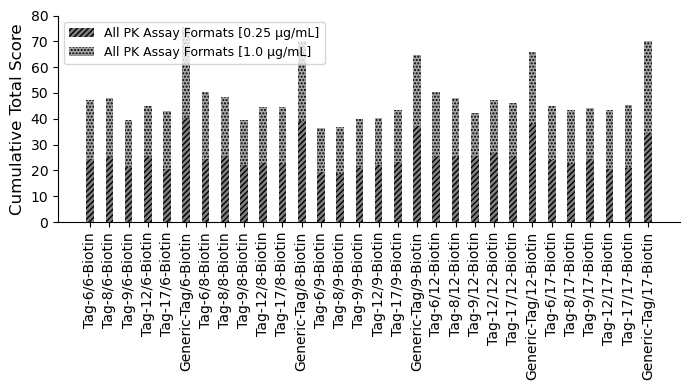

In [7]:
#Plotting normalized PK assay scores for each anti-ID+Tag generated by individual GMMs per metric
replicate_names = ["All PK Assay Formats [0.25 µg/mL]","All PK Assay Formats [1.0 µg/mL]"]
scores = [["Condition","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]

csv_names = ["p25","1"]

for name in csv_names:
    scores = [["Condition",'Background','ULOQ Sen. + Ant.','ULOQ Sen. - Ant.','LLOQ Sen. + Ant.',
               'LLOQ Sen. - Ant.','S/N + Ant.','S/N - Ant.',"Ant. Int. [100x]",
               "Ant. Int. [10x]","Ant. Int. [1x]","Total"]]
    gmm_scores = pd.read_csv("Data/PK/gmm_pk_individual_scores_{0}ug.csv".format(name)).values
    scores = list(scores)
    for i in range(30*6):
        scores.append([gmm_scores[i][0]])
    for i in range(30*6):
            for m in range(1,11):
                scores[i+1].append(round(mmft(gmm_scores[:,m].reshape(-1, 1))[i][0],4))

    c = 1
    for row in scores[1:]:
        scores[c].append(round(sum(row[1:]),4))
        c += 1
    scores = pd.DataFrame(scores)
    scores.to_csv("Data/PK/pk_individual_norm_{0}.csv".format(name),index=False,header=False)

scores = [["Condition","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]

csv_names = ["p25","1"]
first = True
for name in csv_names:
    gmm_scores = pd.read_csv("Data/PK/pk_individual_norm_{0}.csv".format(name)).values
    if first:
        for i in range (30):
            scores.append([gmm_scores[i][0].split(" antigen")[0]])
    first = False
    for i in range(30):
        sub = 0
        for j in range(6):
            sub += gmm_scores[i+30*j][-1]
        scores[i+1].append(round(sub,4))

for i in range(30):
    scores[i+1].append(round(scores[i+1][1]+scores[i+1][2],4))


scores = np.array(scores,dtype=object)
l = [x for x in scores[1:,0]]
b1 = [float(x) for x in scores[1:,1]]
s2 = [float(x) for x in scores[1:,2]]
s3 = [float(x) for x in scores[1:,3]]

width = 0.4
fig = plt.figure(figsize=(7, 4))
fig.set_size_inches(7, 4, forward=True)
ax = plt.subplot(1, 1, 1)
ax.bar(l,b1,width,hatch='//////',color='grey',label="All PK Assay Formats [0.25 µg/mL]")
ax.bar(l,s2,width,bottom=b1,hatch='.....',color='#A6A6A6',label="All PK Assay Formats [1.0 µg/mL]")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Cumulative Total Score',fontsize=12)
plt.yticks(range(0,90,10),fontsize=10)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(10)
plt.legend(fontsize=9)
plt.tight_layout()
#plt.savefig("Plots/PK/pk_individual_norm.pdf",dpi=300)
plt.show()


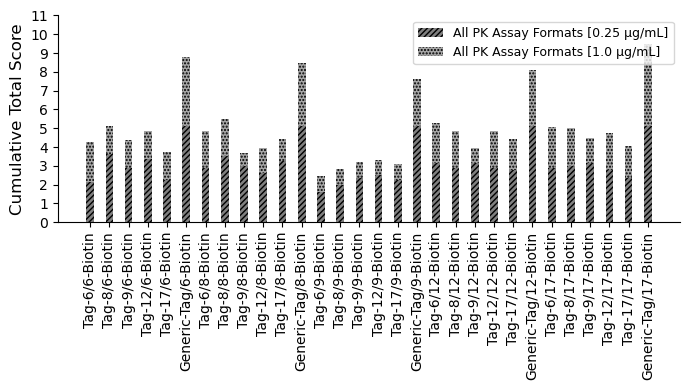

In [9]:
#Plotting normalized PK assay scores for each anti-ID+Tag generated by fitting a GMM on all metrics
#for each antigen concentration
replicate_names = ["All PK Assay Formats [0.25 µg/mL]","All PK Assay Formats [1.0 µg/mL]"]
scores = [["Condition","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]

csv_names = ["p25","1"]
scores = [["Condition","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]
first = True
for name in csv_names:
    gmm_scores = pd.read_csv("Data/PK/gmm_pk_full_scores_{0}ug.csv".format(name)).values
    if first:
        for i in range (30):
            scores.append([gmm_scores[i][0].split(" antigen")[0]])
    first = False
    for i in range(30):
        sub = 0
        for j in range(6):
            sub += round(mmft(gmm_scores[:,1].reshape(-1, 1))[i+30*j][-1],4)
        scores[i+1].append(sub)

for i in range(30):
    scores[i+1].append(scores[i+1][1]+scores[i+1][2])


scores = np.array(scores,dtype=object)
l = [x for x in scores[1:,0]]
b1 = [round(float(x),4) for x in scores[1:,1]]
s2 = [round(float(x),4) for x in scores[1:,2]]
s3 = [round(float(x),4) for x in scores[1:,3]]
scores = pd.DataFrame(scores)
scores.to_csv("Data/PK/pk_full_norm.csv",index=False,header=False)
width = 0.4
fig = plt.figure(figsize=(7, 4))
fig.set_size_inches(7, 4, forward=True)
ax = plt.subplot(1, 1, 1)
ax.bar(l,b1,width,hatch='//////',color='grey',label="All PK Assay Formats [0.25 µg/mL]")
ax.bar(l,s2,width,bottom=b1,hatch='.....',color='#A6A6A6',label="All PK Assay Formats [1.0 µg/mL]")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Cumulative Total Score',fontsize=12)
plt.yticks(range(0,12,1),fontsize=10)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(10)
plt.legend(fontsize=9)
plt.tight_layout()
#plt.savefig("Plots/PK/pk_full_norm.pdf",dpi=300)
plt.show()

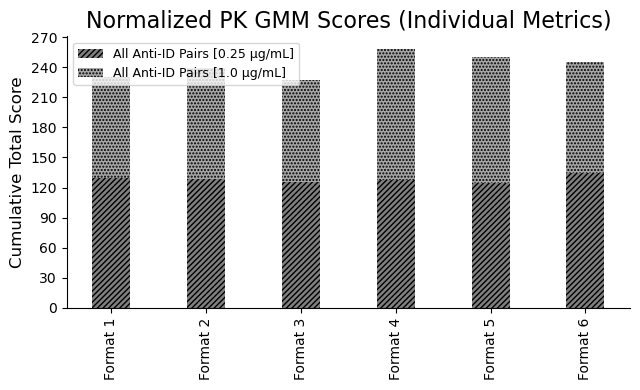

In [11]:
#Plotting normalized PK Format scores generated by individual GMMs per metric
scores = [["Format","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]
for i in range(1,7):
    scores.append([f"Format {i+1}"])
for name in csv_names:
    gmm_scores = pd.read_csv("Data/PK/pk_individual_norm_{0}.csv".format(name)).values
    for i in range(6):
        for j in range(30):
            scores[i+1].append(gmm_scores[30*i+j,-1])


scores = np.array(scores,dtype=object)
scores2 = [["Format","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]
for i in range(6):
    scores2.append([])
    scores2[i+1]=[f"Format {i+1}"]
    scores2[i+1].append(sum(scores[i+1][1:31]))
    scores2[i+1].append(sum(scores[i+1][31:]))
    scores2[i+1].append(sum(scores[i+1][1:]))

scores2 = np.array(scores2,dtype=object)
l = [x for x in scores2[1:,0]]
b1 = [float(x) for x in scores2[1:,1]]
s2 = [float(x) for x in scores2[1:,2]]
s3 = [float(x) for x in scores2[1:,3]]

scores2 = pd.DataFrame(scores2)
scores2.to_csv("Data/PK/formats_individual_norm.csv",index=False,header=False)

width = 0.4
fig = plt.figure(figsize=(6.5, 4))
fig.set_size_inches(6.5, 4, forward=True)
ax = plt.subplot(1, 1, 1)
ax.bar(l,b1,width,hatch='//////',color='grey',label="All Anti-ID Pairs [0.25 µg/mL]")
ax.bar(l,s2,width,bottom=b1,hatch='.....',color='#A6A6A6',label="All Anti-ID Pairs [1.0 µg/mL]")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Cumulative Total Score',fontsize=12)
plt.yticks(range(0,300,30),fontsize=10)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(10)
plt.legend(loc="upper left",fontsize=9)
plt.title("Normalized PK GMM Scores (Individual Metrics)",fontsize=16)
plt.tight_layout()
#plt.savefig("Plots/PK/formats_individual_norm.pdf",dpi=300)
plt.show()

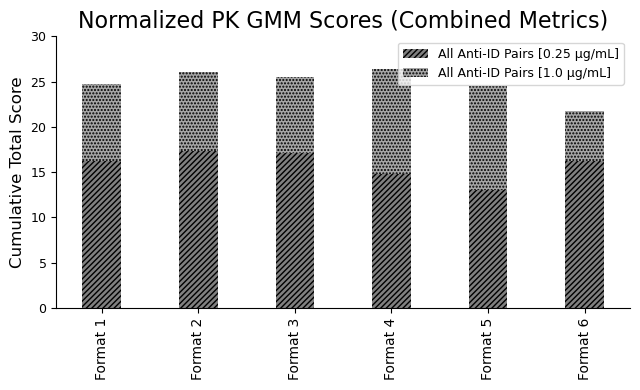

In [12]:
#Plotting normalized PK Format scores generated by fitting a GMM on all metrics
scores = [["Format","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]
for i in range(1,7):
    scores.append([f"Format {i+1}"])
csv_names = ["p25","1"]
for name in csv_names:
    gmm_scores = pd.read_csv("Data/PK/gmm_pk_full_scores_{0}ug.csv".format(name)).values
    for i in range(6):
        for j in range(30):
            scores[i+1].append(mmft(gmm_scores[:,-1].reshape(-1,1))[30*i+j])


scores = np.array(scores,dtype=object)
scores2 = [["Format","[0.25 µg/mL]","[1.0 µg/mL]","Total"]]
for i in range(6):
    scores2.append([])
    scores2[i+1]=[f"Format {i+1}"]
    scores2[i+1].append(sum(scores[i+1][1:31])[0])
    scores2[i+1].append(sum(scores[i+1][31:])[0])
    scores2[i+1].append(sum(scores[i+1][1:])[0])

scores2 = np.array(scores2,dtype=object)
l = [x for x in scores2[1:,0]]
b1 = [round(float(x),4) for x in scores2[1:,1]]
s2 = [round(float(x),4) for x in scores2[1:,2]]
s3 = [round(float(x),4) for x in scores2[1:,3]]

scores2 = pd.DataFrame(scores2)
scores2.to_csv("Data/PK/formats_full_norm.csv",index=False,header=False)

width = 0.4
fig = plt.figure(figsize=(6.5, 4))
fig.set_size_inches(6.5, 4, forward=True)
ax = plt.subplot(1, 1, 1)
ax.bar(l,b1,width,hatch='//////',color='grey',label="All Anti-ID Pairs [0.25 µg/mL]")
ax.bar(l,s2,width,bottom=b1,hatch='.....',color='#A6A6A6',label="All Anti-ID Pairs [1.0 µg/mL]")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Cumulative Total Score',fontsize=12)
plt.yticks(range(0,35,5),fontsize=9)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(10)
plt.legend(loc="upper right",fontsize=9)
plt.title("Normalized PK GMM Scores (Combined Metrics)",fontsize=16)
plt.tight_layout()
#plt.savefig("Plots/PK/formats_full_norm.pdf",dpi=300)
plt.show()